In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as scs
import scipy.linalg as spla
import mplcursors

In [3]:
parquet_file = r'./data/data_synced.parquet'

In [4]:
df = pd.read_parquet(parquet_file)

In [5]:
df_filtered = df.drop(['T1E_x', 'T1E_y', 'T1E_z'], axis=1)
df_filtered = df_filtered.drop(df.index[0:16*9*3600+30000])
df_filtered = df_filtered.drop(df.index[-1])
df_filtered = df_filtered.drop(df.index[16*10*3600:-1])
# df_filtered = df_filtered.fillna(0)

In [6]:
columns = list(df_filtered.columns)

print(columns)


['G1E_x', 'G1E_y', 'G1E_z', 'G1W_x', 'G1W_y', 'G1W_z', 'G2E_x', 'G2E_y', 'G2E_z', 'G2W_x', 'G2W_y', 'G2W_z', 'G3E_x', 'G3E_y', 'G3E_z', 'G3W_x', 'G3W_y', 'G3W_z', 'G4E_x', 'G4E_y', 'G4E_z', 'G4W_x', 'G4W_y', 'G4W_z', 'G5E_x', 'G5E_y', 'G5E_z', 'G5W_x', 'G5W_y', 'G5W_z', 'G6E_x', 'G6E_y', 'G6E_z', 'G6W_x', 'G6W_y', 'G6W_z', 'G7E_x', 'G7E_y', 'G7E_z', 'G7W_x', 'G7W_y', 'G7W_z', 'G8E_x', 'G8E_y', 'G8E_z', 'G8W_x', 'G8W_y', 'G8W_z', 'G9E_x', 'G9E_y', 'G9E_z', 'G9W_x', 'G9W_y', 'G9W_z', 'T1W_x', 'T1W_y', 'T1W_z']


In [7]:
df_filtered

,G1E_x,G1E_y,G1E_z,G1W_x,G1W_y,G1W_z,G2E_x,G2E_y,G2E_z,G2W_x,...,G8W_z,G9E_x,G9E_y,G9E_z,G9W_x,G9W_y,G9W_z,T1W_x,T1W_y,T1W_z
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-26 07:18:48.312500,-0.012280,0.020946,-1.003955,0.008431,-0.009502,-1.000149,-0.008566,0.007931,-1.005702,-0.012017,...,-1.002779,-0.016149,0.047033,-1.000523,0.020603,-0.004875,-1.000363,0.011984,0.077861,-0.999401
2023-10-26 07:18:48.375000,-0.012256,0.020255,-1.001810,0.008825,-0.009309,-1.002120,-0.007184,0.015955,-1.001796,-0.013765,...,-1.002326,-0.016427,0.048655,-0.999501,0.020366,-0.002885,-0.999459,0.013048,0.077586,-0.999427
2023-10-26 07:18:48.437500,-0.012048,0.020165,-1.001703,0.008845,-0.009244,-1.002192,-0.007328,0.016517,-0.997354,-0.011674,...,-1.001626,-0.016102,0.048757,-1.000978,0.020852,-0.003185,-1.003899,0.012798,0.077288,-0.998807
2023-10-26 07:18:48.500000,-0.012469,0.020450,-1.003003,0.008067,-0.009695,-1.000214,-0.008406,0.010023,-1.003723,-0.011517,...,-1.002458,-0.016357,0.046103,-1.003520,0.020770,-0.005217,-1.007205,0.012487,0.077479,-0.999713
2023-10-26 07:18:48.562500,-0.012280,0.018497,-1.004992,0.008175,-0.010621,-1.001254,-0.006941,0.025904,-0.999986,-0.011340,...,-1.003581,-0.016482,0.048745,-1.006911,0.020887,-0.002411,-1.005725,0.012475,0.077613,-0.998702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-26 07:47:33.000000,-0.011249,0.018814,-0.992613,0.008999,-0.008947,-0.992681,-0.006559,0.012286,-1.003975,-0.010509,...,-1.002416,-0.015713,0.049703,-1.002850,0.021163,-0.005425,-1.004223,0.010615,0.078746,-0.998627
2023-10-26 07:47:33.062500,-0.011886,0.019216,-0.992028,0.008848,-0.010293,-0.992258,-0.007148,0.015275,-1.001030,-0.011111,...,-1.002493,-0.016832,0.053534,-1.004339,0.020576,-0.000328,-1.001564,0.011230,0.078743,-0.999785
2023-10-26 07:47:33.125000,-0.013133,0.020610,-0.999523,0.007889,-0.008935,-1.000327,-0.007797,0.013528,-1.005295,-0.011300,...,-1.001688,-0.016977,0.050680,-0.999971,0.018968,-0.005071,-0.997030,0.011200,0.077991,-0.999104


In [7]:
df_filtered.shape

(27600, 57)

In [8]:
acceleration_data = df_filtered.to_numpy()

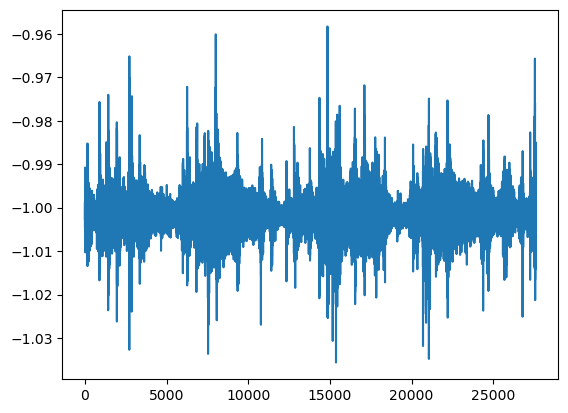

In [9]:
fs = 16
t = np.arange(0, len(acceleration_data))

plt.plot(t, acceleration_data[:,26])
plt.show()

In [10]:
acceleration_data = scs.detrend(acceleration_data, axis=0)

In [11]:
nperseg = 1000
zp = 8
nfft =  nperseg * zp

Sxy = np.array([[scs.csd(ch1, ch2, fs, nperseg=nperseg, nfft=nfft)[1] 
               for ch1 in acceleration_data.T] for ch2 in acceleration_data.T])

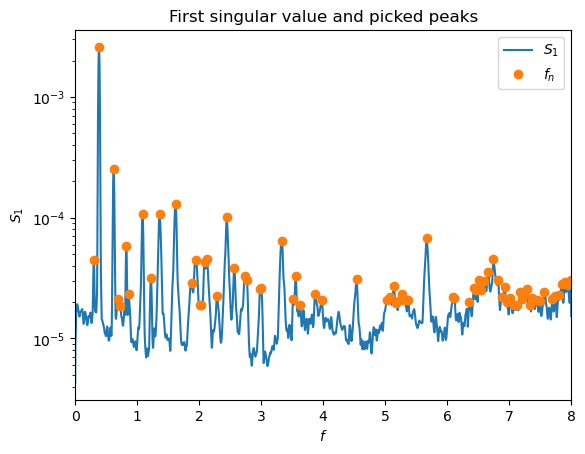

[0.3   0.384 0.62  0.684 0.724 0.824 0.862 1.086 1.222 1.36  1.62  1.876
 1.946 2.012 2.032 2.086 2.122 2.288 2.444 2.566 2.734 2.766 2.988 2.998
 3.332 3.516 3.556 3.628 3.87  3.974 4.538 5.03  5.08  5.14  5.18  5.232
 5.278 5.314 5.372 5.668 6.096 6.114 6.358 6.432 6.472 6.514 6.526 6.552
 6.594 6.664 6.746 6.818 6.88  6.928 6.962 7.018 7.082 7.13  7.168 7.202
 7.234 7.28  7.336 7.37  7.442 7.492 7.568 7.696 7.74  7.796 7.848 7.898
 7.944 7.998]


In [12]:
%matplotlib inline

w = np.linspace(0, fs/2, Sxy.shape[2])
n = acceleration_data.shape[1]

singular_values = np.zeros((n, len(w)))
singular_vector = np.zeros((n, len(w)), dtype=complex)

for k in range(len(w)):
    U, S, V = spla.svd(Sxy[..., k])

    singular_values[:, k] = S[0:n]
    singular_vector[:, k] = U[:,0]

peak_index, _ = scs.find_peaks(singular_values[0, :], height=0.007*np.max(singular_values[0, :]))
peak_index = np.delete(peak_index, [0])
    
plt.plot(w, singular_values[0, :], label='$S_1$')
plt.plot(w[peak_index], singular_values[0, peak_index], "o", label='$f_n$')
plt.yscale("log")
plt.xlim(0, 8)
plt.ylabel('$S_1$')
plt.xlabel('$f$')
plt.legend()
plt.title('First singular value and picked peaks')
# plt.savefig('fdd_graph.png', dpi=200)
plt.show()

print(w[peak_index])

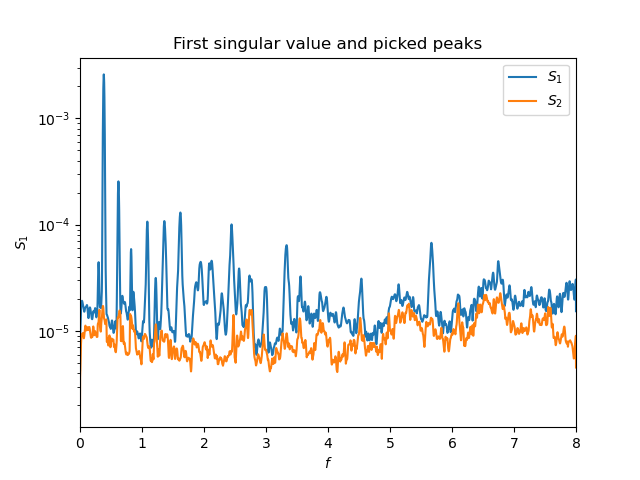

In [13]:
%matplotlib widget

fig = plt.figure()
plt.plot(w, singular_values[0, :], label='$S_1$')
plt.plot(w, singular_values[1, :], label='$S_2$')
plt.yscale("log")
plt.xlim(0, 8)
plt.ylabel('$S_1$')
plt.xlabel('$f$')
plt.legend()
plt.title('First singular value and picked peaks')

points = []

# position = {'NW': 0, 'NE': 0, 'SE': 0, 'SW': 0}
cursor = mplcursors.cursor(hover=False)

@cursor.connect("add")
def cursor_clicked(sel):
    sel.annotation.set_text(
        f'Clicked on\nx: {sel.target[0]:.2f} y: {sel.target[1]:.2f}\nindex: {round(sel.index)}')
    points.append(round(sel.index))
    print(round(sel.index))
    # print("Current list of points:", points)

plt.show()

In [14]:
picked_freq = np.array([
    149,
    192,
    310,
    411,
    543,
    610,
    680,
    809,
    935,
    968,
    1059,
    1146,
    1223,
    1283,
    1367,
    1497,
    1666,
    1778,
    1935,
    1984,
    2123,
    2270,
    2569,
    2832,
    3048,
    3371,
 ])

In [15]:
w[picked_freq]

array([0.298, 0.384, 0.62 , 0.822, 1.086, 1.22 , 1.36 , 1.618, 1.87 ,
       1.936, 2.118, 2.292, 2.446, 2.566, 2.734, 2.994, 3.332, 3.556,
       3.87 , 3.968, 4.246, 4.54 , 5.138, 5.664, 6.096, 6.742])

In [16]:
picked_freq.shape

(26,)

In [17]:
w[peak_index]

array([0.3  , 0.384, 0.62 , 0.684, 0.724, 0.824, 0.862, 1.086, 1.222,
       1.36 , 1.62 , 1.876, 1.946, 2.012, 2.032, 2.086, 2.122, 2.288,
       2.444, 2.566, 2.734, 2.766, 2.988, 2.998, 3.332, 3.516, 3.556,
       3.628, 3.87 , 3.974, 4.538, 5.03 , 5.08 , 5.14 , 5.18 , 5.232,
       5.278, 5.314, 5.372, 5.668, 6.096, 6.114, 6.358, 6.432, 6.472,
       6.514, 6.526, 6.552, 6.594, 6.664, 6.746, 6.818, 6.88 , 6.928,
       6.962, 7.018, 7.082, 7.13 , 7.168, 7.202, 7.234, 7.28 , 7.336,
       7.37 , 7.442, 7.492, 7.568, 7.696, 7.74 , 7.796, 7.848, 7.898,
       7.944, 7.998])

In [18]:
modes = np.zeros((57, len(picked_freq)))

for k in range(picked_freq.shape[0]):
    modes[:, k] = singular_vector.real[:, picked_freq[k]]
    modes[:, k] = modes[:, k] / np.max(np.real(modes[:, k]))

In [19]:
df_modes = pd.DataFrame(modes)

df_modes.to_csv('./results/fdd_modes.csv', index=False, header=False, float_format='%.13f')

In [20]:
df_freq = pd.DataFrame(w[picked_freq])

df_freq.to_csv("./results/fdd_freq.csv", index=False, header=False, float_format='%.13f')

In [23]:
np.save("./results/fdd_freq.npy", w[picked_freq])
np.save("./results/fdd_modes.npy", modes)